In [2]:
import pandas as pd

In [3]:
file_path = '../../data/interim/groceries/box_builder_data_set/feature_frame.csv'
chunks = pd.read_csv(file_path, chunksize=10000)
feature_frame = pd.concat(chunks, ignore_index=True)
print(f"DataFrame final con shape: {feature_frame.shape}")

DataFrame final con shape: (2880549, 27)


In [5]:
feature_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Hay 2,9 millones de registros aproximadamente. Hay 27 columnas, las cuales hay que analizar una a una para comprender mejor el dataset y el problema. Hay que tener en cuenta que no vienen de las bases de datos del ejercicio 1, puesto que había 8773 pedidos (creo), y se habían vendido 118k productos diferentes. No corresponde a los 2,9 millones de observaciones de este df. Además, hay variables nuevas como active_snoozed (ver de dónde sale).

Por lo que parece, manteniendo la notación, se tienen todos los productos que se vendieron, con variant_id siendo el id de producto. Vamos a intentar describir las variables:
1. variant_id: id producto.
1. product_type: tipo de producto.
1. created_at: fecha creación pedido.
1. order_date: fecha formalización pedido.
2. order_id: id orden (pedido).
3. user_id: id usuario.
4. user_order_seq: nº pedido usuario (secuencia).
5. outcome:
6. ordered_before:
7. abandonded_before:
8. active_snoozed:
9. set_as_regular: podrá tener que ver con la tabla regulars?.
10. normalised_price: precio normal.
11. discount_pct: discount price (que era el price normal).
1. vendor: vendedor.
12. global_popularity:
12. count_adults:
13. count_children:
14. count_babies:
15. count_pets:
16. people_ex_baby:
17. days_since_purchase_variant_id:
18. avg_days_to_buy_variant_id:
19. std_days_to_buy_variant_id:
20. days_since_purchase_product_type:
21. avg_days_to_buy_product_type:
22. std_days_to_buy_product_type:

In [6]:
feature_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
variant_id,2880549.0,3.401250e+13,2.786246e+11,3.361529e+13,3.380354e+13,3.397325e+13,3.428495e+13,3.454300e+13
order_id,2880549.0,2.978388e+12,2.446292e+11,2.807986e+12,2.875152e+12,2.902856e+12,2.922034e+12,3.643302e+12
user_id,2880549.0,3.750025e+12,1.775710e+11,3.046041e+12,3.745901e+12,3.812775e+12,3.874925e+12,5.029635e+12
user_order_seq,2880549.0,3.289342e+00,2.140176e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.100000e+01
outcome,2880549.0,1.153669e-02,1.067876e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ordered_before,2880549.0,2.113868e-02,1.438466e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
abandoned_before,2880549.0,6.092589e-04,2.467565e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
active_snoozed,2880549.0,2.290188e-03,4.780109e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
set_as_regular,2880549.0,3.629864e-03,6.013891e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
normalised_price,2880549.0,1.272808e-01,1.268378e-01,1.599349e-02,5.394416e-02,8.105178e-02,1.352670e-01,1.000000e+00


In [7]:
feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [8]:
# Conteo de missings por columna
feature_frame.isnull().sum()

# Porcentaje de missings por columna
feature_frame.isnull().mean() * 100

variant_id                          0.0
product_type                        0.0
order_id                            0.0
user_id                             0.0
created_at                          0.0
order_date                          0.0
user_order_seq                      0.0
outcome                             0.0
ordered_before                      0.0
abandoned_before                    0.0
active_snoozed                      0.0
set_as_regular                      0.0
normalised_price                    0.0
discount_pct                        0.0
vendor                              0.0
global_popularity                   0.0
count_adults                        0.0
count_children                      0.0
count_babies                        0.0
count_pets                          0.0
people_ex_baby                      0.0
days_since_purchase_variant_id      0.0
avg_days_to_buy_variant_id          0.0
std_days_to_buy_variant_id          0.0
days_since_purchase_product_type    0.0


In [9]:
(feature_frame == "").sum()          # Conteo por columna
(feature_frame == "").mean() * 100   # Porcentaje por columna

variant_id                          0.0
product_type                        0.0
order_id                            0.0
user_id                             0.0
created_at                          0.0
order_date                          0.0
user_order_seq                      0.0
outcome                             0.0
ordered_before                      0.0
abandoned_before                    0.0
active_snoozed                      0.0
set_as_regular                      0.0
normalised_price                    0.0
discount_pct                        0.0
vendor                              0.0
global_popularity                   0.0
count_adults                        0.0
count_children                      0.0
count_babies                        0.0
count_pets                          0.0
people_ex_baby                      0.0
days_since_purchase_variant_id      0.0
avg_days_to_buy_variant_id          0.0
std_days_to_buy_variant_id          0.0
days_since_purchase_product_type    0.0


In [10]:
feature_frame.nunique()

variant_id                           976
product_type                          62
order_id                            3446
user_id                             1937
created_at                          3446
order_date                           149
user_order_seq                        20
outcome                                2
ordered_before                         2
abandoned_before                       2
active_snoozed                         2
set_as_regular                         2
normalised_price                     127
discount_pct                         526
vendor                               264
global_popularity                   5968
count_adults                           5
count_children                         4
count_babies                           2
count_pets                             5
people_ex_baby                         5
days_since_purchase_variant_id       142
avg_days_to_buy_variant_id           122
std_days_to_buy_variant_id           819
days_since_purch

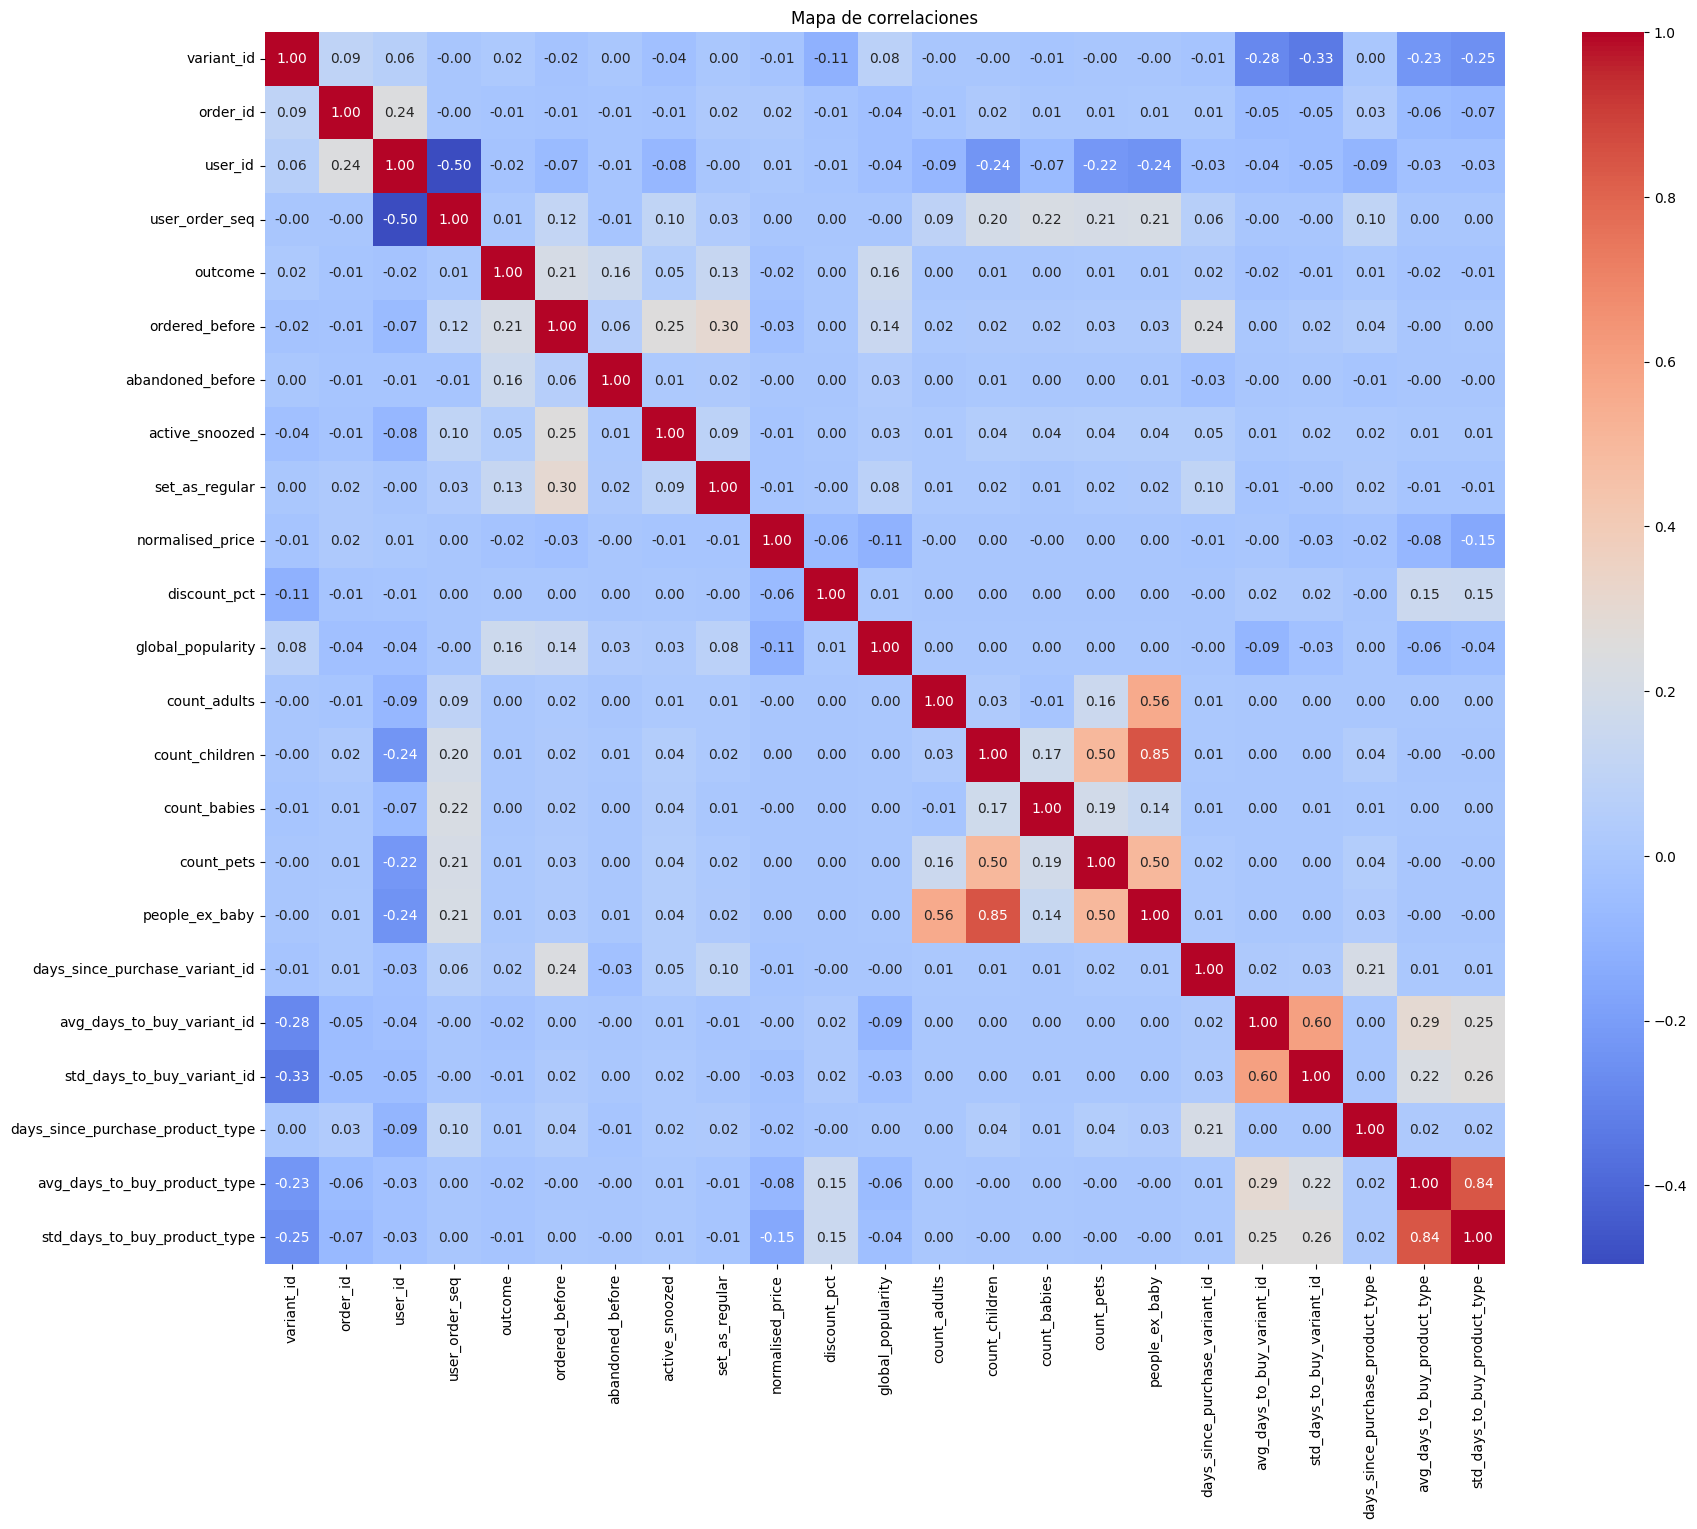

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))  # Ajusta según el número de variables
sns.heatmap(feature_frame.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()


In [13]:
for col in feature_frame.select_dtypes(include='object').columns:
    if feature_frame[col].nunique() < 20:
        print(f"\n{col}:\n", feature_frame[col].value_counts())

Quizás sea necesario tomar una muestra aleatoria y luego hacer la gráfica para que no haya problemas a la hora de ejecutar.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = feature_frame.select_dtypes(include='number').columns

# Muestra los boxplots en varias filas si hay muchas variables
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=feature_frame[col])
    plt.title(f'Distribución de {col}')
    plt.show()